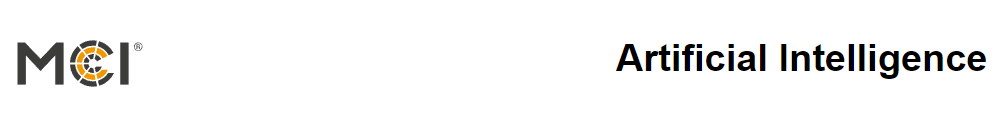

---

# 01 Assignment Regression Solution

The goal of this assignment is to check whether you have understood the principle of gradient desent/ascend

### Gradient Descent

As the gradient descent was done in a lecture, this assignment is about the application of gradient descent. Please assign your first and last name to the variable NAME


In [1]:
NAME="Bernhard Hollaus" # this is the variable you should put your name in

assert isinstance(NAME, str)


In [2]:
seednumber=0
for letter in NAME:
    seednumber+=ord(letter)
print("your seed number is",seednumber) # this is done so everybody has a different seed and the generated data will look slightly different.

your seed number is 1566


As a next step we load the data about , that normaly comes from a given experiment (Aquire data). Though, before we can do that we import all relevant libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-4-13cce98af820>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X = np.sin(np.arange(0, stopargument, 0.1)).flatten()
<ipython-input-4-13cce98af820>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y = np.cos(np.arange(0, stopargument, 0.1)).flatten()


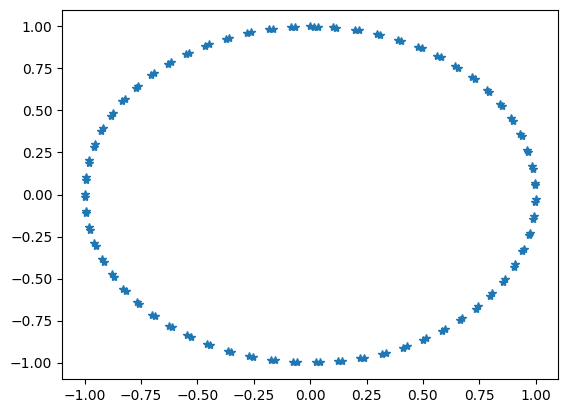

In [4]:
np.random.seed(seednumber) # we do this to be able to create always the same data, so we use a given seed

# Make data.
stopargument=(np.random.rand(1,1)+1)*10
X = np.sin(np.arange(0, stopargument, 0.1)).flatten()
Y = np.cos(np.arange(0, stopargument, 0.1)).flatten()

plt.plot(X,Y, '*')

Most of the people like to have visual information about the given data. Therefore, we use a plot to visualize the data (see cell above). In the cell below you have to define all the functions that are necessary to find the point within the circle formed by the datathat is as far as possible away from the measurments.

$X_p$...X-component of the point that is as far away as possible but inside the circle of the measurements

$Y_p$...Y-component of the point that is as far away as possible but inside the circle of the measurements


Hint: You can use the majority of the functions from the gradient decent algorithm that was discussed in the lecture. You just have to make small adaptions. Additionally the cell below includes the code to manually find a good $X_p$ and $Y_p$

close to optimal yp = [0.01]
close to optimal xp = [4.4408921e-16]
MSE = [0.99988966]


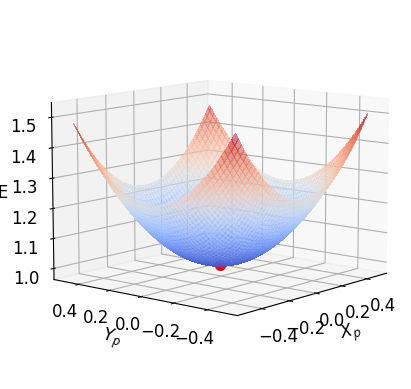

<Figure size 2000x1000 with 0 Axes>

In [5]:
from matplotlib import cm

xp=np.arange(-0.5,0.5,0.01)
yp=np.arange(-0.5,0.5,0.01)
X_plot,Y_plot=np.meshgrid(xp,yp)
Z_plot=np.zeros(X_plot.shape)

for q in range(len(xp)):
    for w in range(len(yp)):
        Z_plot[w,q]=np.sum(np.power(Y-yp[w],2)+np.power(X-xp[q],2))/len(Y)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X_plot, Y_plot, Z_plot, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)
ax.view_init(elev=10, azim=220) # if neseccary adapt the azim to have a better view in the plot

indices=np.where(np.min(Z_plot)==Z_plot)
print("close to optimal yp =",yp[indices[0]])
print("close to optimal xp =",xp[indices[1]])
print("MSE =",Z_plot[indices[0],indices[1]])

ax.scatter(xp[indices[1]], yp[indices[0]], Z_plot[indices[0],indices[1]], color='red', s=50)
plt.figure(figsize=(20, 10))

ax.set_ylabel('$Y_p$',fontsize=12)
ax.set_xlabel('$X_p$',fontsize=12)
ax.set_zlabel('MSE',fontsize=12)

ax.tick_params(direction='out', labelsize=12)

In [10]:
def mean_squared_error(X,Y,xp,yp):
    return np.sum(np.sqrt(np.power(xp-X,2)+np.power(yp-Y,2)))/len(X)

def update_parameter(X,Y,xp,yp,learning_rate):
    dx=(np.sum(xp-X))*2/len(X)
    dy=(np.sum(yp-Y))*2/len(Y)
    xp_new=xp-learning_rate*dx
    yp_new=yp-learning_rate*dy
    return xp_new, yp_new

def our_own_gradient_descent(X,Y,number_of_iterations,xp,yp,learning_rate):

    num_iterations=int(number_of_iterations)

    x_array=np.zeros(num_iterations)
    y_array=np.zeros(num_iterations)
    MSE=np.zeros(num_iterations)

    x_array[0]=xp
    y_array[0]=yp

    print("Initial Values for xp, yp: ",x_array[0],y_array[0])

    for each_iter in range(num_iterations-1):
        MSE[each_iter]=mean_squared_error(X,Y,x_array[each_iter],y_array[each_iter])
        x_array[each_iter+1],y_array[each_iter+1]=update_parameter(X,Y,x_array[each_iter],y_array[each_iter],learning_rate)

    MSE[-1]=mean_squared_error(X,Y,x_array[each_iter],y_array[each_iter])

    print("Final Estimate of p0, p1: ",x_array[-1],y_array[-1],"with a MSE of:", MSE[-1])
    return x_array,y_array,MSE

In our next step we need to define a learing rate and a number of iterations. The learning rate and the number of iterations is predefined and you should not change it in this assignment

In [11]:
learning_rate=0.001
number_of_iterations=10000
np.random.seed(seednumber)
xp=np.random.rand(1,1) # this is the initial value for x_p
yp=np.random.rand(1,1) # this is the initial value for y_p

Now we can try to apply the gradient ascent algorithm on our example.

In [12]:
xp_array,yp_array,MSE=our_own_gradient_descent(X,Y,number_of_iterations,xp,yp,learning_rate)

<ipython-input-10-f3cb10b43fe7>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_array[0]=xp
<ipython-input-10-f3cb10b43fe7>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_array[0]=yp


Initial Values for xp, yp:  0.2687749076284258 0.3434407393904044
Final Estimate of p0, p1:  0.0001768584652090983 0.010517067809318324 with a MSE of: 0.9999167295475625


Below you should illustrate how the parameter $X_p$ and $Y_p$ are optimized from iteration to iteration. See the image below to get an idea how it should look like. Hint: The shape of the curve depends on the initial values.

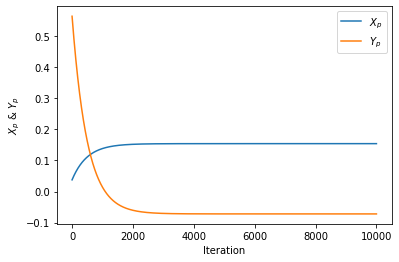

Text(0, 0.5, '$x_p$ and $y_p$')

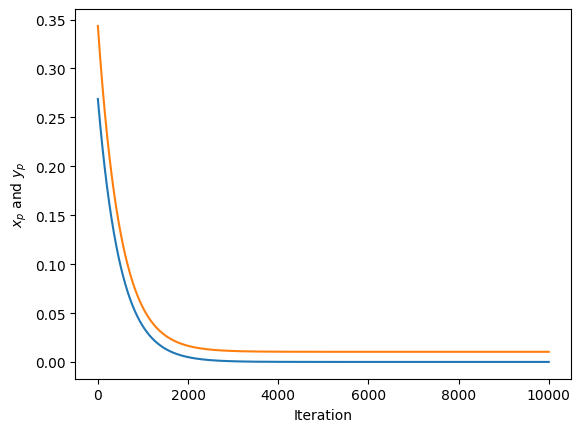

In [15]:
plt.plot(range(number_of_iterations),xp_array)
plt.xlabel("Iteration")
plt.plot(range(number_of_iterations),yp_array)
plt.xlabel("Iteration")
plt.ylabel("$x_p$ and $y_p$")

Below this cell you can see how the MSE is changing from iteration to iteration. See the image below to get an idea how it should look like. Hint: The shape of the curve depends on the initial values.

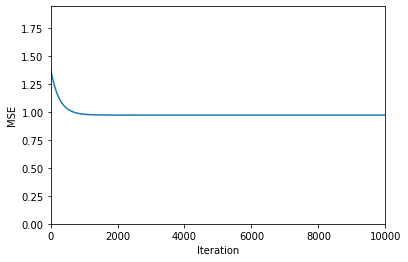

Text(0, 0.5, 'MSE')

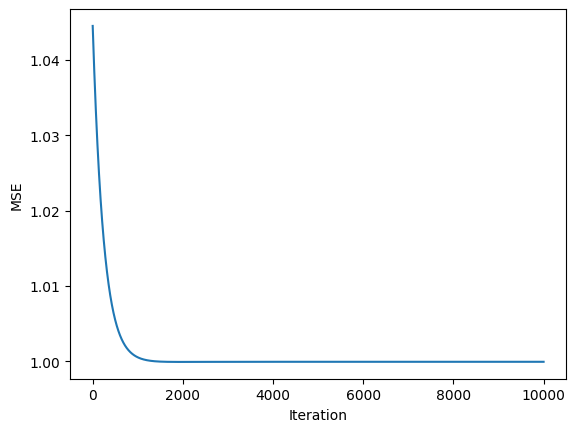

In [16]:
plt.plot(range(number_of_iterations),MSE)
plt.xlabel("Iteration")
plt.ylabel("MSE")